#***INTEGRANTES***

### Marnol Sanchez
### Oscar Polma
### Ariel Valenzuela

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings ## lo usaremos para evitar el mensaje de advertencia que se
                ##muestra a la salida de la pregunta 6

In [ ]:
## cargamos la base de datos que fue subida a githud
url = ("https://raw.githubusercontent.com/oscarpolma/Certamen_1_Sistemas_inf_empr./main/notas.csv")
data = pd.read_table(url,delimiter = ",") ## aqui ordenamos los valores en forma de tabla

In [ ]:
data.info()  ## vemos la info de las variables de la bd

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6879 entries, 0 to 6878
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Matemática      6879 non-null   int64  
 1   Lenguaje        6879 non-null   int64  
 2   Ciencias        6879 non-null   int64  
 3   NEM             6879 non-null   int64  
 4   Colegio_Egreso  6879 non-null   object 
 5   Sexo            6879 non-null   object 
 6   Nota            6879 non-null   float64
 7   asi_Cod         6879 non-null   int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 430.1+ KB


In [ ]:
data.describe()  ## un pequeño resumen de las variables cuantitativas

,Matemática,Lenguaje,Ciencias,NEM,Nota,asi_Cod
count,6879.000000,6879.000000,6879.000000,6879.000000,6879.000000,6879.000000
mean,667.450938,614.717401,617.840965,643.715947,3.604274,517767.368513
std,57.144068,62.700552,56.218732,77.285934,1.365651,7407.630390
min,479.000000,393.000000,426.000000,420.000000,1.000000,510145.000000
25%,629.000000,572.000000,581.000000,598.000000,2.600000,510145.000000
50%,659.000000,613.000000,618.000000,659.000000,4.000000,520145.000000
75%,695.000000,658.000000,653.000000,701.000000,4.500000,520145.000000
max,851.000000,822.000000,837.000000,826.000000,7.000000,530024.000000


###1. Gráfico de barras con las Notas promedio por Tipo de colegio de egreso.

In [ ]:
data1 = data["Nota"].groupby(data["Colegio_Egreso"]).mean();data1 ## se agrupan por tipo de colegio y se saca la media de la variable

Colegio_Egreso
Municipalizado    3.418116
Privado           3.973377
Subvencionado     3.557943
Name: Nota, dtype: float64

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

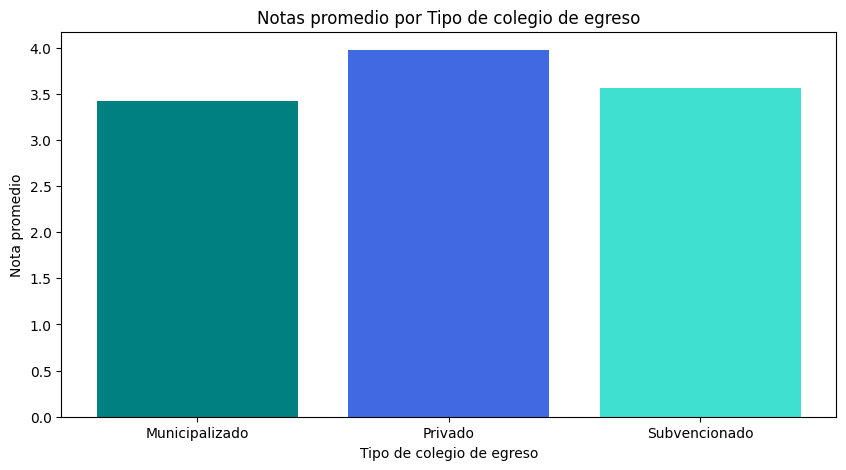

In [ ]:
plt.rcParams["figure.figsize"] = [10,5] ## ajustamos el tamaño del grafico

plt.bar(data1.keys(),data1, color=["teal", "royalblue", "turquoise"])  ##se le asigna colores diferentes a las barras para diferenciarlas

plt.title("Notas promedio por Tipo de colegio de egreso") ##titulo
plt.xlabel("Tipo de colegio de egreso") ## titulo eje x
plt.ylabel("Nota promedio") ## titulo eje y
plt.xticks(rotation=0) ## grados de titulo de barra

plt

Se puede observar que el grafico de barras presenta el  promedio de notas mas altas en los colegios de egreso principalmente por el colegio privado. Posterior mente el subvencionado y por ultimo el municipalizado. Obteniendo como promedio 3.973377 el privado, 3.557943 subvencionado y por ultimo 3.418116 el municipalizado


###2. Gráfico de barras con promedio NEM por Tipo de colegio de egreso.

In [ ]:
data2 = data["NEM"].groupby(data["Colegio_Egreso"]).mean();data2 # se agrupan por tipo de colegio de egreso y se calcula la media de NEM

Colegio_Egreso
Municipalizado    653.674470
Privado           628.115974
Subvencionado     644.664243
Name: NEM, dtype: float64

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

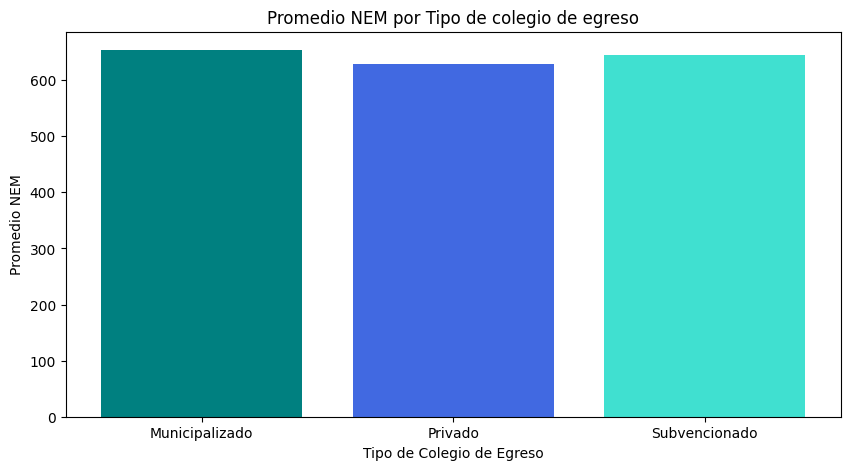

In [ ]:
plt.rcParams["figure.figsize"] = [10,5] ## ajustamos el tamaño del grafico

plt.bar(data2.keys(),data2, color=["teal", "royalblue", "turquoise"]) #se le asigna colores diferentes a las barras para diferenciarlas

plt.title("Promedio NEM por Tipo de colegio de egreso")
plt.xlabel("Tipo de Colegio de Egreso")
plt.ylabel("Promedio NEM")
plt.xticks(rotation=0)

plt

El grafico de barra presentado anteriormente representa el promedio NEM por los tipos de colegios de egreso. Teniendo como mayor promedio los colegios municipalizados, posteriormente los subvencionados y por ultimo los colegios privados. Obteniendo como resultados 653.674470 el municipalizado. A continuación el subvencionado con  644.664243 y por último el privado con 628.115974.

### 3. Gráfico de barras comparativas y apiladas con las Notas promedio por tipo de colegio y sexo.

In [ ]:
data3a = data.groupby(["Colegio_Egreso", "Sexo"])["Nota"].mean();data3a # se agrupa por tipo de colegio de egreso y sexo, y se calcula el promedio de notas

Colegio_Egreso  Sexo
Municipalizado  F       3.333235
                M       3.437964
Privado         F       4.104527
                M       3.945124
Subvencionado   F       3.519364
                M       3.567268
Name: Nota, dtype: float64

In [ ]:
data3b = data3a.unstack(level=-1);data3b #ordenamos los datos en forma de tabla

Sexo,F,M
Colegio_Egreso,,
Municipalizado,3.333235,3.437964
Privado,4.104527,3.945124
Subvencionado,3.519364,3.567268


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

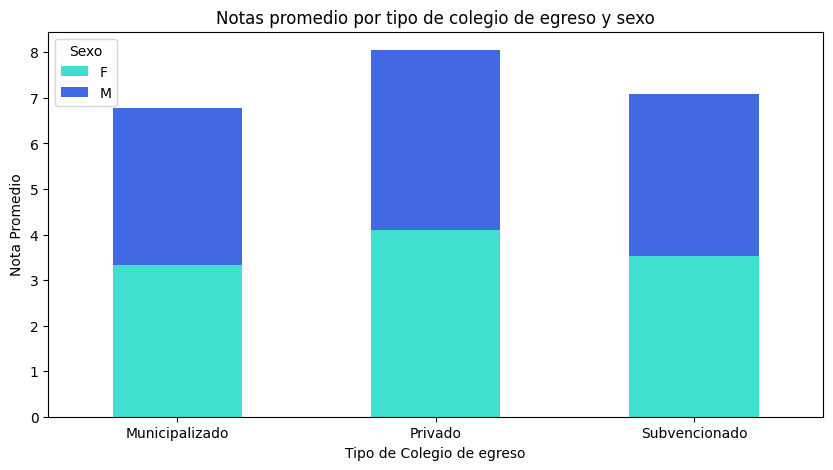

In [ ]:
plt.rcParams["figure.figsize"] = [10,5] ## ajustamos el tamaño del grafico

data3b.plot.bar(stacked=True, color=["turquoise", "royalblue"]) ## stacked=True lo ordena de manera apilada

plt.title("Notas promedio por tipo de colegio de egreso y sexo")
plt.xlabel("Tipo de Colegio de egreso")
plt.ylabel("Nota Promedio")
plt.xticks(rotation=0)
plt.legend(title="Sexo")

plt

El grafico en barra presentado. Representa las notas promedio por el tipo de colegio de egreso y sexo. Donde las notas de los colegios privados son más altas en comparación a los municipalizados y subvencionados.
Teniendo como resultado de mayor a menor los colegios privados, luego el subvencionado y por ultimo el municipalizado.


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

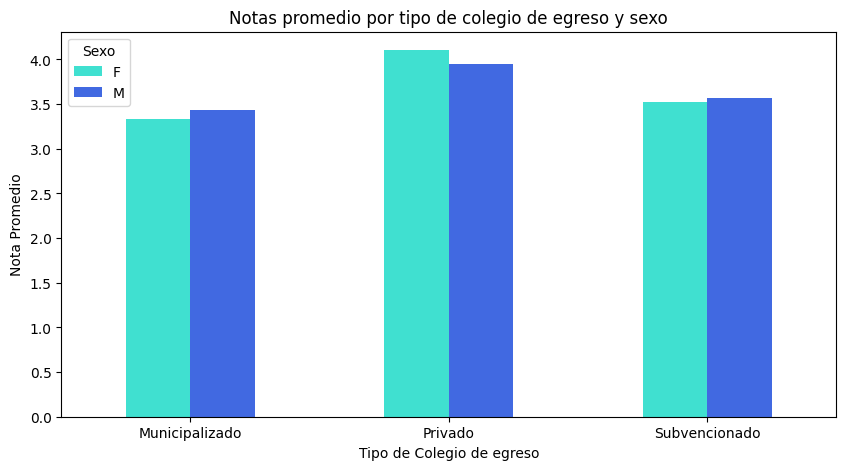

In [ ]:
plt.rcParams["figure.figsize"] = [10,5] ## ajustamos el tamaño del grafico

data3b.plot.bar( color=["turquoise", "royalblue"]) ## grafico comparativo

plt.title("Notas promedio por tipo de colegio de egreso y sexo")
plt.xlabel("Tipo de Colegio de egreso")
plt.ylabel("Nota Promedio")
plt.xticks(rotation=0)
plt.legend(title="Sexo")

plt

El grafico presentado. Representa las notas promedio por el tipo de colegio de egreso y sexo. Donde las notas del sexo Masculino son mas altas en los colegios Municipalizado y subvencionado. Obteniendo como resultados 3.333235 el sexo femenino y 3.437964 el sexo masculino en el colegio municipalizado. luego en el colegio subvencionado se obtiene como promedio un 3.519364 el sexo femenino y 3.567268 el sexo masculino. Y por ultimo en el colegio privado. El promedio mas alto está dado por el sexo femenino, obteniendo como resultado un 4.104527 y el sexo femenino un 3.945124.

###4. Gráfico de barras apiladas con las Notas promedio por Asignatura “asi_Cod” y “Sexo”.

In [ ]:
data4a = data.groupby(["asi_Cod", "Sexo"])["Nota"].mean();data4a ## se aprupa por codigo de asignatura y sexo y se calcula el promedio de notas

asi_Cod  Sexo
510145   F       3.381038
         M       3.437905
520145   F       3.538856
         M       3.494949
530024   F       4.129167
         M       4.235339
Name: Nota, dtype: float64

In [ ]:
data4b = data4a.unstack(level=-1);data4b ## se ordena en forma de tabla

Sexo,F,M
asi_Cod,,
510145,3.381038,3.437905
520145,3.538856,3.494949
530024,4.129167,4.235339


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

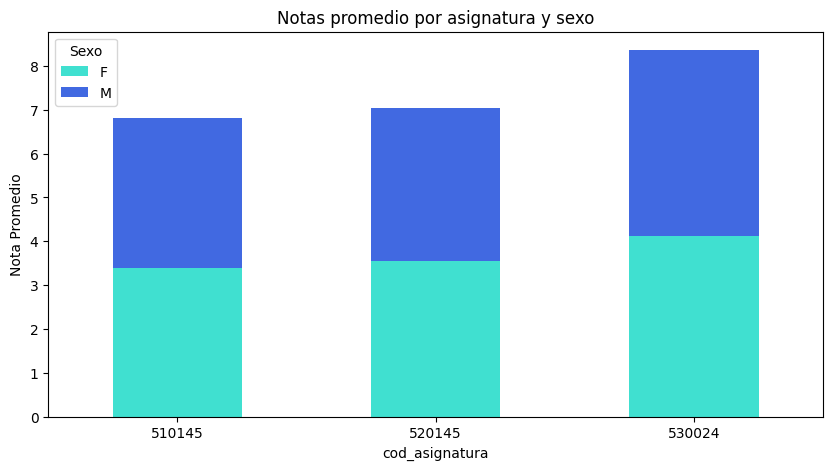

In [ ]:
plt.rcParams["figure.figsize"] = [10,5] ## ajustamos el tamaño del grafico

data4b.plot.bar(stacked=True, color=["turquoise", "royalblue"]) ## stacked=True lo ordena de manera apilada

plt.title("Notas promedio por asignatura y sexo")
plt.xlabel("cod_asignatura")
plt.ylabel("Nota Promedio")
plt.xticks(rotation=0)
plt.legend(title="Sexo")

plt

A continuación, se presenta un gráfico en barra sobre las Notas promedio por asignatura y sexo.
teniendo como código de asignatura 510154, 520145 y 530024 posteriormente. Además se puede observar que en el primer y segundo código de asignatura el sexo femenino es superior en cuanto al promedio obteniendo como resultado un 3.381038 el sexo femenino y un 3.437905 el sexo masculino en el código 510145. Luego en el código 520145 se obtiene un promedio de 3.5388856 el sexo femenino y un 3.494949 el sexo masculino. por último, en el código 530024 el sexo masculino tiene un promedio superior al femenino obtenido como resultado un promedio de 4.235339 el sexo masculino y un 4.129167 el sexo femenino.


###5. Gráfico de dispersión (Scatterplot) de notas de las alumnas provenientes de colegios privados con NEM mayor o igual a 700.

In [ ]:
## filtramos la base de datos con los requisitos del enunciado
data5 = data[(data["Sexo"] == "F") & (data["Colegio_Egreso"] == "Privado") & (data["NEM"] >= 700)];data5

,Matemática,Lenguaje,Ciencias,NEM,Colegio_Egreso,Sexo,Nota,asi_Cod
24,713,638,656,764,Privado,F,4.6,520145
87,849,692,693,744,Privado,F,5.8,520145
105,810,722,638,702,Privado,F,3.2,510145
168,630,602,578,702,Privado,F,3.2,510145
178,718,691,714,804,Privado,F,6.6,530024
...,...,...,...,...,...,...,...,...
6685,623,602,622,702,Privado,F,5.2,520145
6707,712,619,727,743,Privado,F,4.6,520145
6708,712,638,657,762,Privado,F,4.2,510145
6734,718,691,715,803,Privado,F,4.9,510145


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

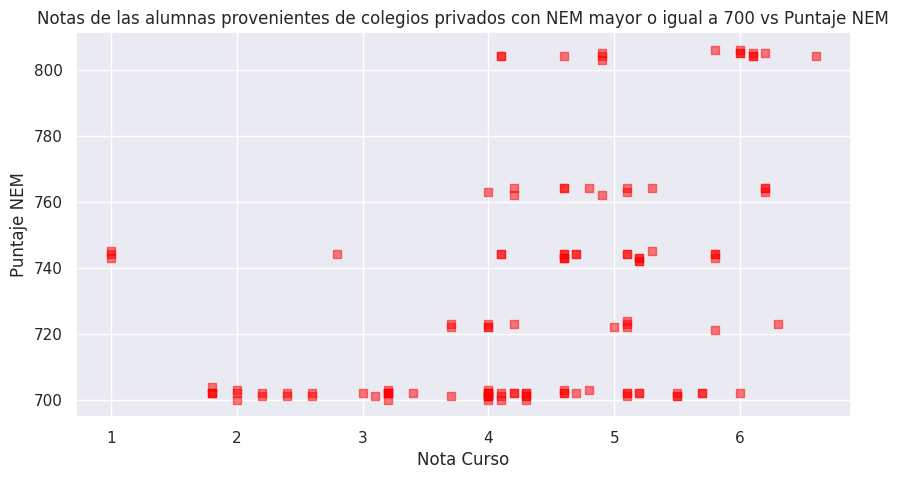

In [ ]:
plt.rcParams["figure.figsize"] = [10,5]## se ajusta tamaño de grafico

sns.set()
sns.set_style("darkgrid")
plt.scatter(data5.Nota, data5.NEM, color='red', marker='s', alpha=0.5) ## se grafica las notas nem con los datos filtrados en data5

plt.title("Notas de las alumnas provenientes de colegios privados con NEM mayor o igual a 700 vs Puntaje NEM")
plt.xlabel("Nota Curso")
plt.ylabel("Puntaje NEM")

plt

como se puede observar en el grafico  de dispercion. en el eje horizontal muestra las notas del curso y en el eje vertical se presenta el puntaje nem. cabe mencionar que existe una baja correlacion positiva. donde el valor se incrementa nitidamente a medida que el valor de x aumenta. ademas existe una mayor concentracion en las notas 4 y 5. obteniendo como puntajes > o = a 700

###6. Histograma de la distribución de Notas de alumnos y alumnas (ambas en una sola visualización).

<ipython-input-18-198080bd6664>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data["Sexo"] == "M"].Nota, kde=False, bins=10,label="Alumnos", color="royalblue") #distribucion alumnos. kde=False indica distribucion a traves de frecuencia
<ipython-input-18-198080bd6664>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad63

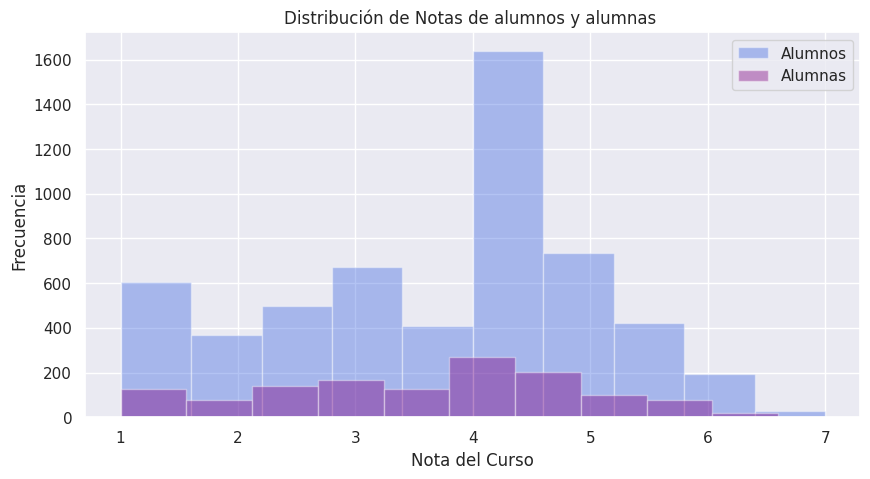

In [ ]:
plt.rcParams["figure.figsize"] = [10,5]## se ajusta tamaño de grafico

sns.distplot(data[data["Sexo"] == "M"].Nota, kde=False, bins=10,label="Alumnos", color="royalblue") #distribucion alumnos. kde=False indica distribucion a traves de frecuencia
sns.distplot(data[data["Sexo"] == "F"].Nota, kde=False, bins=10, label="Alumnas", color="purple") #distribucion alumnas

plt.title("Distribución de Notas de alumnos y alumnas ")
plt.xlabel("Nota del Curso")
plt.ylabel("Frecuencia")
plt.legend()

plt

warnings.filterwarnings("ignore") ## para ignorar mensajes de advertencia que arroja

el histograma presentado anteriormente trata sobre la distribucion de notas de alumnos teniendo como color azul y alumnas de color rosado. el eje horizontal hace referencia a las notas del curso y en el eje vertical las frecuencias de 0 a 1600. cabe mencionar que el histograma presentado muestra una distribucion asimetrica hacia izquierda. donde los datos se encuentran altamente concentradoos entre 3 y 5. considerando la frecuencia entre alumnos y alumnas, es posible saber que existe una mayor cantidad de alumnos en los valores 4 y 4,5.


###7. Construya una matriz de gráficos para visualizar las distribuciones de las variables cuantitativas y sus correlaciones según “Sexo” (elimine el campo ”asi_Cod”, ya que no tendría sentido analizar el código de asignatura).

In [ ]:
#data7 = data.drop("asi_Cod",axis=1);data7

In [ ]:
data_m = data[data["Sexo"] == "M"] ## se crea bd con datos con sexo masculino
data_M = data_m.drop("asi_Cod",axis=1);data_M

,Matemática,Lenguaje,Ciencias,NEM,Colegio_Egreso,Sexo,Nota
1,705,651,638,641,Subvencionado,M,4.7
2,590,581,451,641,Municipalizado,M,2.8
4,693,645,575,641,Subvencionado,M,4.0
5,664,591,598,480,Privado,M,2.1
7,623,530,614,641,Municipalizado,M,2.3
...,...,...,...,...,...,...,...
6873,737,682,715,765,Privado,M,4.0
6874,612,632,568,640,Subvencionado,M,2.2
6875,609,427,510,744,Municipalizado,M,3.1
6876,678,633,671,661,Subvencionado,M,5.4


In [ ]:
data_f = data[data["Sexo"] == "F"] ## se crea bd con datos con sexo femenino
data_F = data_f.drop("asi_Cod",axis=1);data_F

,Matemática,Lenguaje,Ciencias,NEM,Colegio_Egreso,Sexo,Nota
0,626,607,578,660,Subvencionado,F,1.0
3,700,710,588,721,Subvencionado,F,3.6
6,646,608,584,599,Municipalizado,F,3.7
9,648,700,613,557,Privado,F,2.4
18,693,658,659,700,Municipalizado,F,4.3
...,...,...,...,...,...,...,...
6844,657,645,644,682,Municipalizado,F,4.0
6855,608,606,600,660,Subvencionado,F,4.5
6864,620,613,598,557,Subvencionado,F,3.5
6867,648,578,596,578,Subvencionado,F,2.0


In [ ]:
#sns.pairplot(data7, hue="Sexo", palette="husl")
#plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

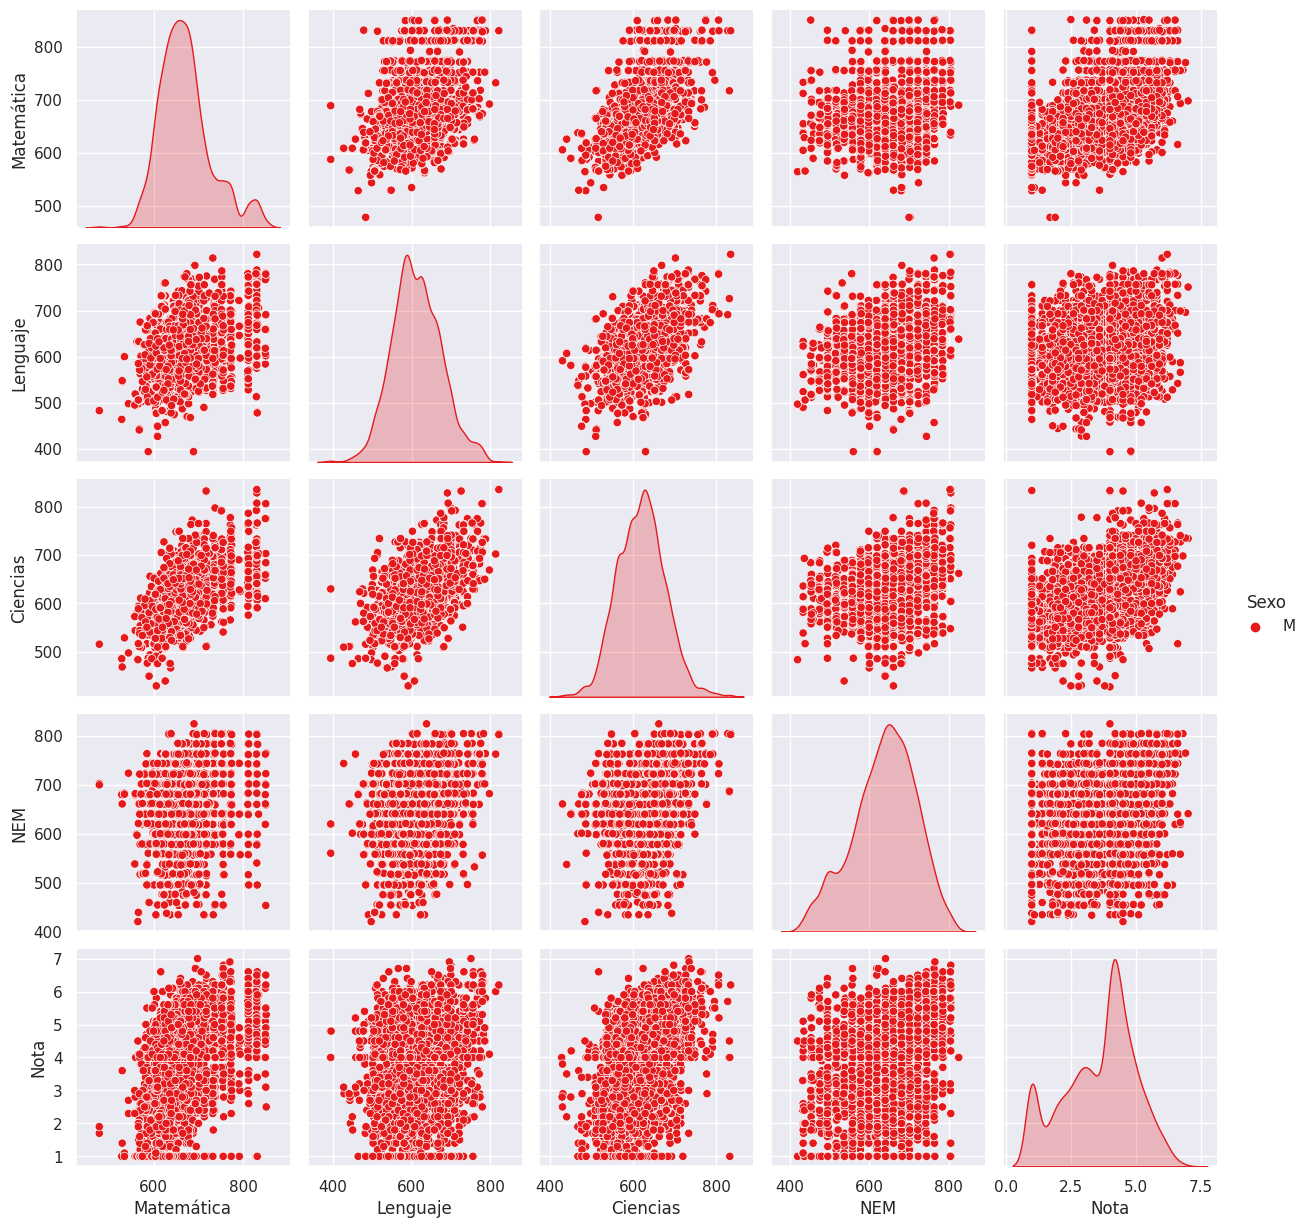

In [ ]:
sns.pairplot(data_M, hue="Sexo", palette="Set1")
plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

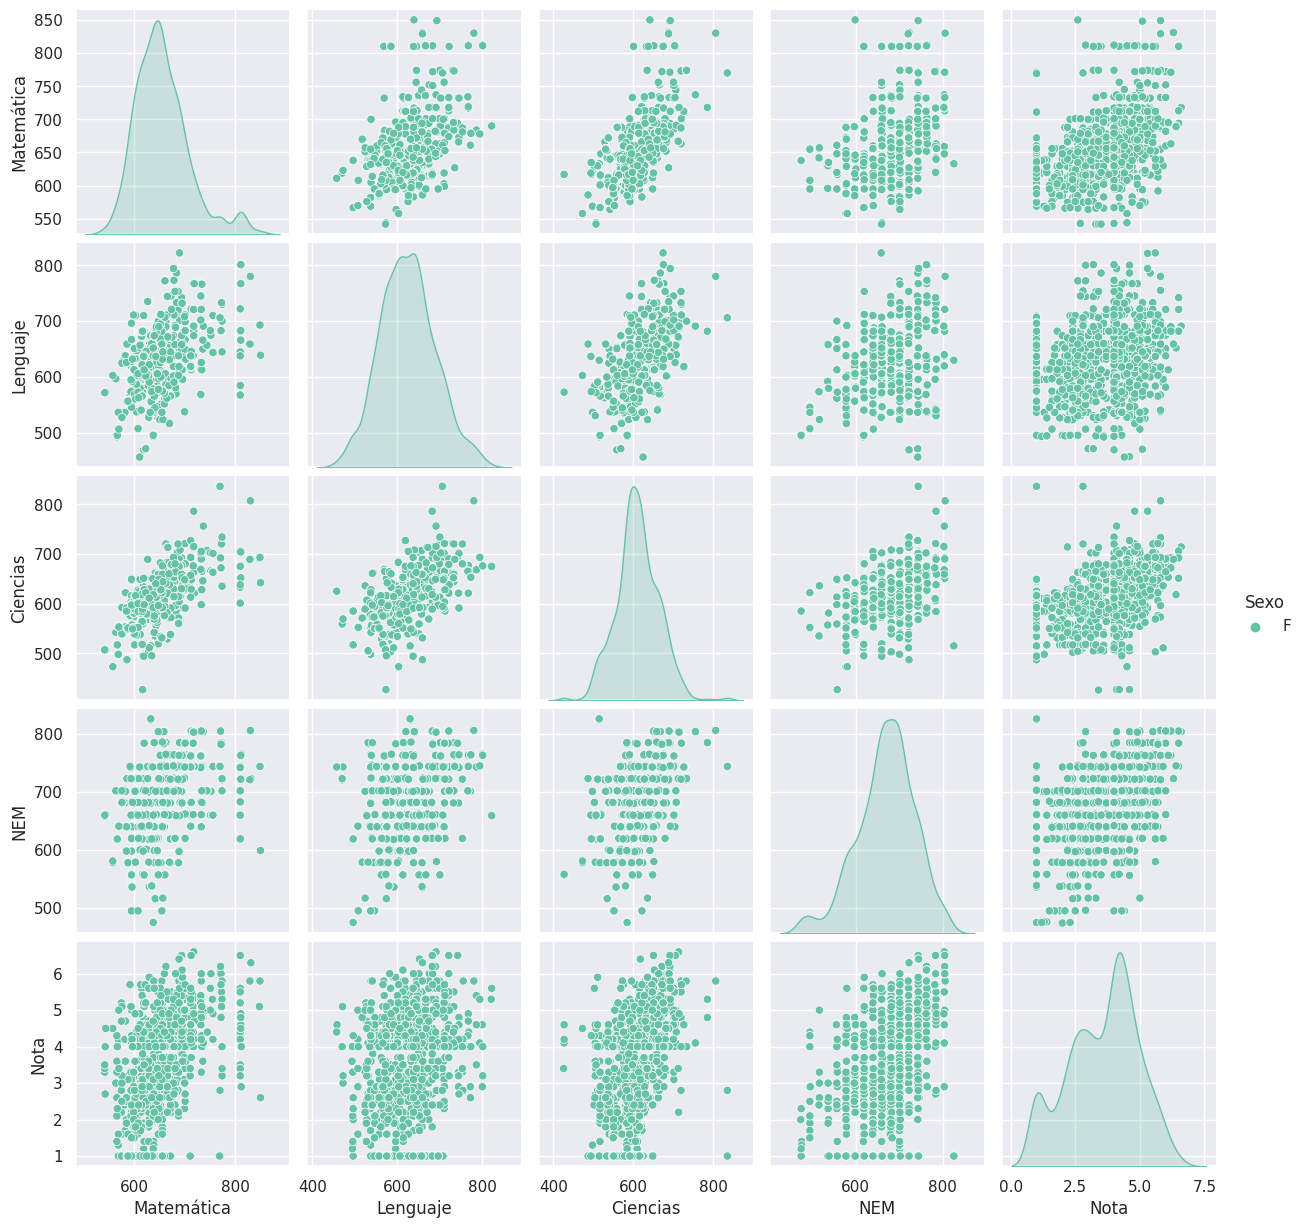

In [ ]:
sns.pairplot(data_F, hue="Sexo", palette="Set2")
plt

 Como se puede observar en la matriz de gráficos. Las dispersiones están dadas por variables cuantitativas en base al sexo masculino y femenino. Para el caso de los hombres y mujeres, se ve una correlacion positiva fuerte entre las variables matematicas y ciencias, asi como tambien entre lenguaje y ciencias. Se puede observar una cantidad de datos mas concentrados entre los graficos que son de sexo masculino que femenino, ya que en la base de datos existe una mayor cantidad de estudiantes de sexo masculino que femenino. y tambien para el caso de hombres y muejeres se observa que la variable NEM, con el resto de variables, graficamente tienen dispersiones con formas mas o menos similares, lo que significa que el nem puede estar relacionado fuertemente con las variables Matematica, Lenguaje, Ciencias y Nota.